In [1]:
import sys
import os
sys.path.append(os.path.abspath("Pytorch/"))
sys.path.append(os.path.abspath("models/"))

In [2]:
from FBSNNs import *
from BlackScholesBarenblatt100D import *

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 1 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [5]:
model.load_model("models/BlackScholesBarenblattMLMC100D1Layer256.pth")

In [6]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 6.037e+05, Y0: -2.081, Time: 0.01, Learning Rate: 1.000e-03
It: 100, Loss: 1.398e+05, Y0: 42.560, Time: 0.91, Learning Rate: 1.000e-03
It: 200, Loss: 3.148e+04, Y0: 66.465, Time: 0.82, Learning Rate: 1.000e-03
It: 300, Loss: 1.391e+04, Y0: 76.642, Time: 0.90, Learning Rate: 1.000e-03
It: 400, Loss: 8.515e+03, Y0: 75.699, Time: 0.89, Learning Rate: 1.000e-03
It: 500, Loss: 6.840e+03, Y0: 76.779, Time: 0.92, Learning Rate: 1.000e-03
It: 600, Loss: 5.851e+03, Y0: 77.425, Time: 1.20, Learning Rate: 1.000e-03
It: 700, Loss: 5.239e+03, Y0: 76.901, Time: 1.35, Learning Rate: 1.000e-03
It: 800, Loss: 5.173e+03, Y0: 76.295, Time: 1.32, Learning Rate: 1.000e-03
It: 900, Loss: 5.031e+03, Y0: 75.378, Time: 0.94, Learning Rate: 1.000e-03
It: 1000, Loss: 5.730e+03, Y0: 73.689, Time: 0.89, Learning Rate: 1.000e-03
It: 1100, Loss: 5.153e+03, Y0: 75.376, Time: 1.01, Learning Rate: 1.000e-03
It: 1200, Loss: 5.324e+03, Y0: 73.740, Time: 0.96, Learning Rate: 1.000e-03
It: 1300, Loss: 4

In [6]:
graph = model.iteration, model.training_loss

In [9]:
n_iter = 20 * 10**2
lr = 1e-5

In [10]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 20000, Loss: 4.404e+03, Y0: 76.142, Time: 0.11, Learning Rate: 1.000e-05
It: 20100, Loss: 4.508e+03, Y0: 76.058, Time: 10.70, Learning Rate: 1.000e-05
It: 20200, Loss: 4.513e+03, Y0: 76.034, Time: 11.24, Learning Rate: 1.000e-05
It: 20300, Loss: 4.277e+03, Y0: 76.148, Time: 11.07, Learning Rate: 1.000e-05
It: 20400, Loss: 4.677e+03, Y0: 76.143, Time: 12.40, Learning Rate: 1.000e-05
It: 20500, Loss: 4.898e+03, Y0: 76.289, Time: 13.21, Learning Rate: 1.000e-05
It: 20600, Loss: 4.508e+03, Y0: 76.348, Time: 13.40, Learning Rate: 1.000e-05
It: 20700, Loss: 4.607e+03, Y0: 76.132, Time: 13.56, Learning Rate: 1.000e-05
It: 20800, Loss: 4.520e+03, Y0: 76.147, Time: 13.23, Learning Rate: 1.000e-05
It: 20900, Loss: 4.660e+03, Y0: 75.816, Time: 11.67, Learning Rate: 1.000e-05
It: 21000, Loss: 4.344e+03, Y0: 75.755, Time: 9.79, Learning Rate: 1.000e-05
It: 21100, Loss: 4.550e+03, Y0: 75.922, Time: 9.95, Learning Rate: 1.000e-05
It: 21200, Loss: 4.415e+03, Y0: 76.106, Time: 10.29, Learnin

In [9]:
def figsize(scale, nplots = 1):
    fig_width_pt = 438.17227                        
    inches_per_pt = 1.0/72.27                       
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            
    fig_width = fig_width_pt*inches_per_pt*scale    
    fig_height = nplots*fig_width*golden_mean             
    fig_size = [fig_width,fig_height]
    return fig_size

In [8]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

In [9]:
samples = 10

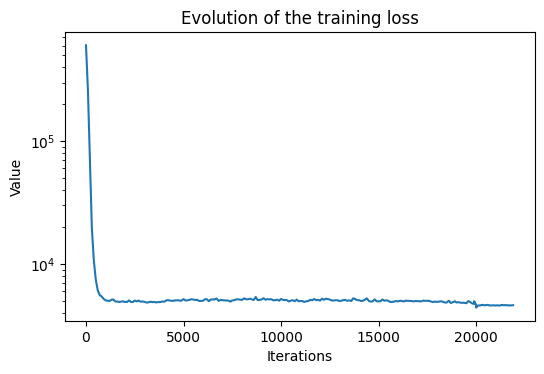

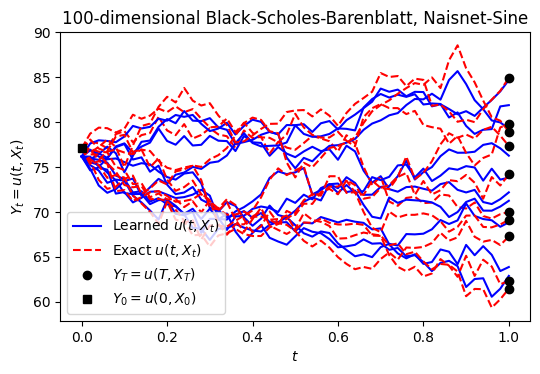

In [10]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
# plt.savefig('Figures/BlackScholesBarenblattMLMC100D1Layer10Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100D1Layer10Preds.pdf')
plt.show()

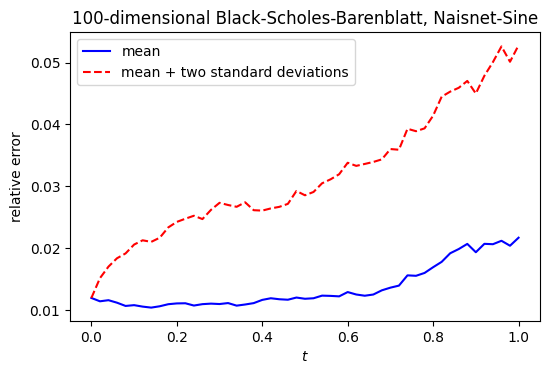

In [11]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100D1Layer10Errors.pdf')
plt.show()

In [16]:
model.save_model("models/BlackScholesBarenblattMLMC100D1Layer256.pth")

In [12]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 2 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [13]:
model.load_model("models/BlackScholesBarenblattMLMC100D2Layer256.pth")

In [12]:
graph = model.iteration, model.training_loss

In [18]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 5.643e+05, Y0: 1.045, Time: 0.14, Learning Rate: 1.000e-03
It: 100, Loss: 7.723e+03, Y0: 72.926, Time: 1.46, Learning Rate: 1.000e-03
It: 200, Loss: 3.335e+03, Y0: 76.180, Time: 1.47, Learning Rate: 1.000e-03
It: 300, Loss: 1.320e+03, Y0: 74.408, Time: 1.42, Learning Rate: 1.000e-03
It: 400, Loss: 7.529e+02, Y0: 76.421, Time: 1.40, Learning Rate: 1.000e-03
It: 500, Loss: 7.089e+02, Y0: 77.063, Time: 1.35, Learning Rate: 1.000e-03
It: 600, Loss: 5.578e+02, Y0: 77.303, Time: 1.40, Learning Rate: 1.000e-03
It: 700, Loss: 4.236e+02, Y0: 77.013, Time: 1.43, Learning Rate: 1.000e-03
It: 800, Loss: 3.939e+02, Y0: 77.071, Time: 1.39, Learning Rate: 1.000e-03
It: 900, Loss: 4.615e+02, Y0: 77.419, Time: 1.43, Learning Rate: 1.000e-03
It: 1000, Loss: 4.045e+02, Y0: 77.002, Time: 1.42, Learning Rate: 1.000e-03
It: 1100, Loss: 3.135e+02, Y0: 76.924, Time: 1.31, Learning Rate: 1.000e-03
It: 1200, Loss: 4.512e+02, Y0: 77.135, Time: 1.35, Learning Rate: 1.000e-03
It: 1300, Loss: 3.

In [19]:
n_iter = 21 * 10**2
lr = 1e-5

In [20]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 4.821e+01, Y0: 76.378, Time: 0.18, Learning Rate: 1.000e-05
It: 20000, Loss: 2.002e+01, Y0: 76.865, Time: 15.87, Learning Rate: 1.000e-05
It: 20100, Loss: 1.954e+01, Y0: 76.822, Time: 16.27, Learning Rate: 1.000e-05
It: 20200, Loss: 2.061e+01, Y0: 76.856, Time: 16.31, Learning Rate: 1.000e-05
It: 20300, Loss: 1.869e+01, Y0: 76.860, Time: 16.10, Learning Rate: 1.000e-05
It: 20400, Loss: 1.974e+01, Y0: 76.867, Time: 16.56, Learning Rate: 1.000e-05
It: 20500, Loss: 2.305e+01, Y0: 76.835, Time: 16.01, Learning Rate: 1.000e-05
It: 20600, Loss: 2.241e+01, Y0: 76.868, Time: 16.31, Learning Rate: 1.000e-05
It: 20700, Loss: 1.847e+01, Y0: 76.869, Time: 15.95, Learning Rate: 1.000e-05
It: 20800, Loss: 1.981e+01, Y0: 76.850, Time: 16.58, Learning Rate: 1.000e-05
It: 20900, Loss: 1.952e+01, Y0: 76.849, Time: 16.38, Learning Rate: 1.000e-05
It: 21000, Loss: 2.044e+01, Y0: 76.890, Time: 16.12, Learning Rate: 1.000e-05
It: 21100, Loss: 1.969e+01, Y0: 76.907, Time: 16.19, Learn

In [14]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

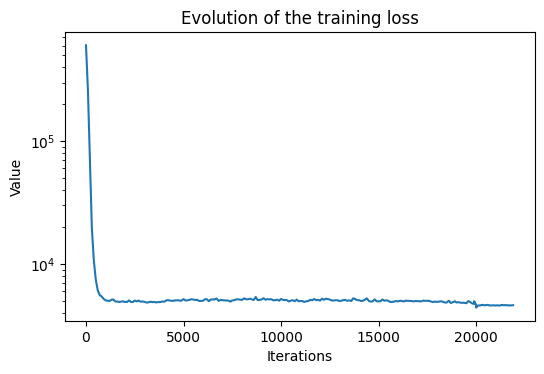

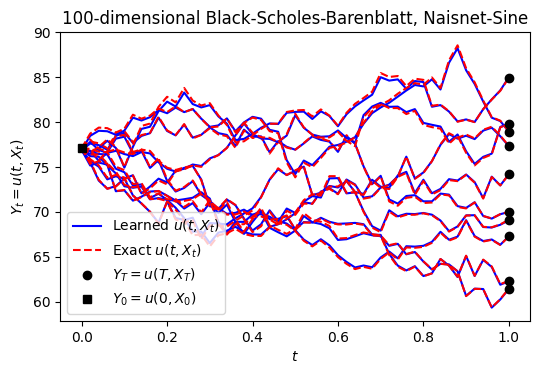

In [15]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM10Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM10Preds.pdf')

plt.show()

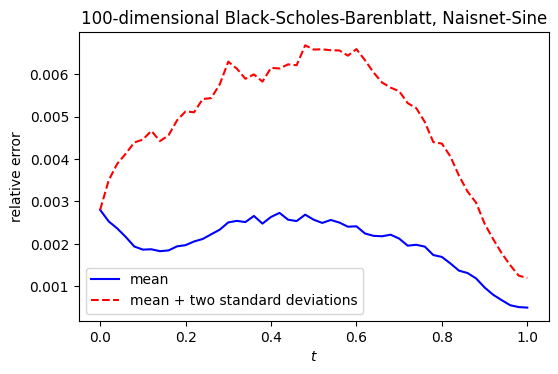

In [16]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM10Errors.pdf')
plt.show()

In [22]:
model.save_model("models/BlackScholesBarenblattMLMC100D2Layer256.pth")

In [17]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 3 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [18]:
model.load_model("models/BlackScholesBarenblattMLMC100D3Layer256.pth")

In [19]:
graph = model.iteration, model.training_loss

In [26]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 5.870e+05, Y0: -0.753, Time: 0.03, Learning Rate: 1.000e-03
It: 100, Loss: 4.440e+03, Y0: 73.657, Time: 1.88, Learning Rate: 1.000e-03
It: 200, Loss: 2.655e+03, Y0: 77.195, Time: 1.75, Learning Rate: 1.000e-03
It: 300, Loss: 5.320e+03, Y0: 69.144, Time: 1.73, Learning Rate: 1.000e-03
It: 400, Loss: 3.108e+03, Y0: 71.087, Time: 1.94, Learning Rate: 1.000e-03
It: 500, Loss: 3.339e+03, Y0: 70.386, Time: 1.73, Learning Rate: 1.000e-03
It: 600, Loss: 2.319e+03, Y0: 79.503, Time: 1.79, Learning Rate: 1.000e-03
It: 700, Loss: 1.893e+03, Y0: 71.783, Time: 1.76, Learning Rate: 1.000e-03
It: 800, Loss: 1.290e+03, Y0: 72.779, Time: 1.94, Learning Rate: 1.000e-03
It: 900, Loss: 2.190e+03, Y0: 79.792, Time: 1.77, Learning Rate: 1.000e-03
It: 1000, Loss: 1.345e+03, Y0: 72.637, Time: 1.80, Learning Rate: 1.000e-03
It: 1100, Loss: 1.529e+03, Y0: 72.064, Time: 1.77, Learning Rate: 1.000e-03
It: 1200, Loss: 1.558e+03, Y0: 78.667, Time: 1.85, Learning Rate: 1.000e-03
It: 1300, Loss: 1

In [27]:
n_iter = 21 * 10**2
lr = 1e-5

In [28]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 3.663e+01, Y0: 76.724, Time: 0.24, Learning Rate: 1.000e-05
It: 20000, Loss: 2.024e+01, Y0: 76.976, Time: 22.13, Learning Rate: 1.000e-05
It: 20100, Loss: 1.839e+01, Y0: 76.977, Time: 21.98, Learning Rate: 1.000e-05
It: 20200, Loss: 1.877e+01, Y0: 76.965, Time: 22.33, Learning Rate: 1.000e-05
It: 20300, Loss: 1.726e+01, Y0: 76.965, Time: 21.94, Learning Rate: 1.000e-05
It: 20400, Loss: 1.791e+01, Y0: 76.961, Time: 22.42, Learning Rate: 1.000e-05
It: 20500, Loss: 2.110e+01, Y0: 76.952, Time: 22.51, Learning Rate: 1.000e-05
It: 20600, Loss: 1.975e+01, Y0: 76.928, Time: 22.16, Learning Rate: 1.000e-05
It: 20700, Loss: 1.846e+01, Y0: 76.977, Time: 22.07, Learning Rate: 1.000e-05
It: 20800, Loss: 1.722e+01, Y0: 76.941, Time: 22.75, Learning Rate: 1.000e-05
It: 20900, Loss: 1.732e+01, Y0: 76.946, Time: 22.21, Learning Rate: 1.000e-05
It: 21000, Loss: 1.825e+01, Y0: 76.973, Time: 22.23, Learning Rate: 1.000e-05
It: 21100, Loss: 1.675e+01, Y0: 76.990, Time: 21.68, Learn

In [20]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

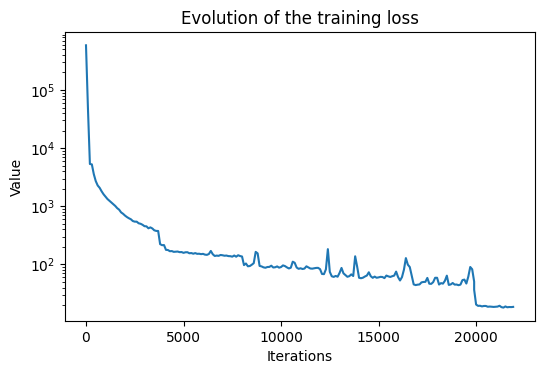

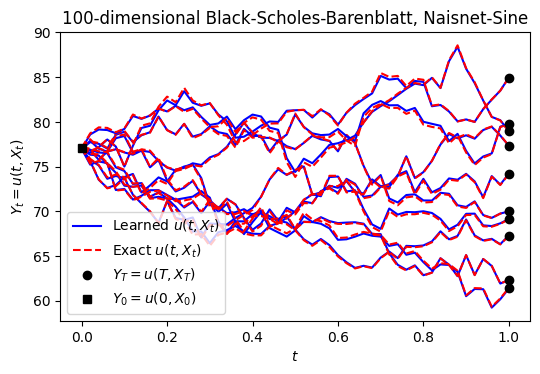

In [21]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM25Loss.pdf')


plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM25Preds.pdf')

plt.show()

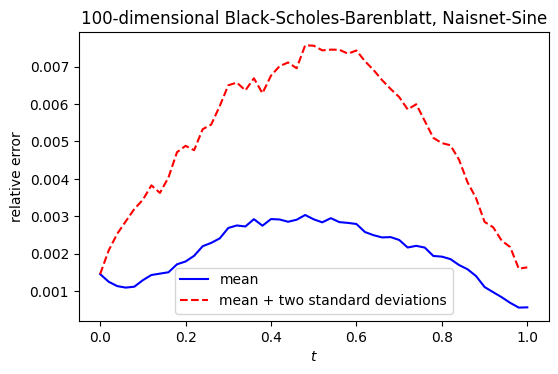

In [22]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM25Errors.pdf')

plt.show()

In [35]:
model.save_model("models/BlackScholesBarenblattMLMC100D3Layer256.pth")

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 2 * [100] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [24]:
model.load_model("models/BlackScholesBarenblattMLMC100D2Layer100.pth")

FileNotFoundError: [Errno 2] No such file or directory: 'models/BlackScholesBarenblattMLMC100D2Layer100.pth'

In [24]:
graph = model.iteration, model.training_loss

In [4]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 5.430e+05, Y0: 1.133, Time: 0.49, Learning Rate: 1.000e-03
It: 100, Loss: 1.366e+05, Y0: 40.720, Time: 0.89, Learning Rate: 1.000e-03
It: 200, Loss: 5.415e+04, Y0: 59.796, Time: 0.88, Learning Rate: 1.000e-03
It: 300, Loss: 7.976e+03, Y0: 72.032, Time: 0.92, Learning Rate: 1.000e-03
It: 400, Loss: 4.742e+03, Y0: 76.439, Time: 0.86, Learning Rate: 1.000e-03
It: 500, Loss: 3.160e+03, Y0: 73.495, Time: 0.94, Learning Rate: 1.000e-03
It: 600, Loss: 2.305e+03, Y0: 76.649, Time: 1.13, Learning Rate: 1.000e-03
It: 700, Loss: 1.958e+03, Y0: 74.322, Time: 1.00, Learning Rate: 1.000e-03
It: 800, Loss: 1.871e+03, Y0: 74.011, Time: 1.07, Learning Rate: 1.000e-03
It: 900, Loss: 1.421e+03, Y0: 76.840, Time: 0.95, Learning Rate: 1.000e-03
It: 1000, Loss: 1.301e+03, Y0: 74.648, Time: 1.09, Learning Rate: 1.000e-03
It: 1100, Loss: 1.141e+03, Y0: 74.423, Time: 1.33, Learning Rate: 1.000e-03
It: 1200, Loss: 1.160e+03, Y0: 77.468, Time: 1.30, Learning Rate: 1.000e-03
It: 1300, Loss: 8.

In [5]:
n_iter = 21 * 10**2
lr = 1e-5

In [6]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 6.363e+01, Y0: 77.365, Time: 0.11, Learning Rate: 1.000e-05
It: 20000, Loss: 3.068e+01, Y0: 76.816, Time: 12.56, Learning Rate: 1.000e-05
It: 20100, Loss: 3.220e+01, Y0: 76.849, Time: 12.54, Learning Rate: 1.000e-05
It: 20200, Loss: 2.830e+01, Y0: 76.848, Time: 12.75, Learning Rate: 1.000e-05
It: 20300, Loss: 3.209e+01, Y0: 76.871, Time: 12.93, Learning Rate: 1.000e-05
It: 20400, Loss: 3.750e+01, Y0: 76.916, Time: 15.38, Learning Rate: 1.000e-05
It: 20500, Loss: 2.850e+01, Y0: 76.819, Time: 13.52, Learning Rate: 1.000e-05
It: 20600, Loss: 4.458e+01, Y0: 76.881, Time: 14.34, Learning Rate: 1.000e-05
It: 20700, Loss: 3.410e+01, Y0: 76.843, Time: 16.27, Learning Rate: 1.000e-05
It: 20800, Loss: 7.755e+01, Y0: 76.868, Time: 16.55, Learning Rate: 1.000e-05
It: 20900, Loss: 3.037e+01, Y0: 76.862, Time: 16.40, Learning Rate: 1.000e-05
It: 21000, Loss: 3.208e+01, Y0: 76.854, Time: 13.76, Learning Rate: 1.000e-05
It: 21100, Loss: 2.837e+01, Y0: 76.867, Time: 13.34, Learn

In [7]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

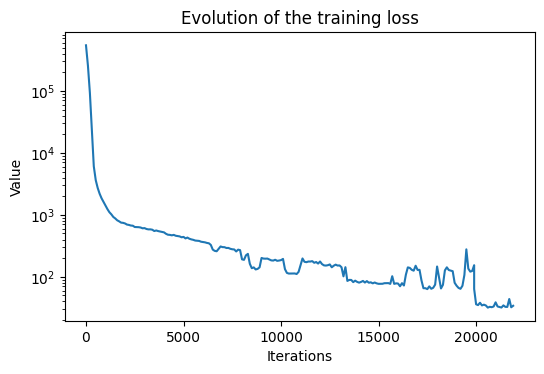

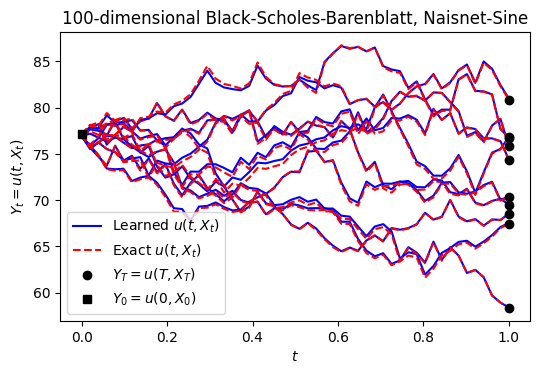

In [10]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM50Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM50Preds.pdf')

plt.show()

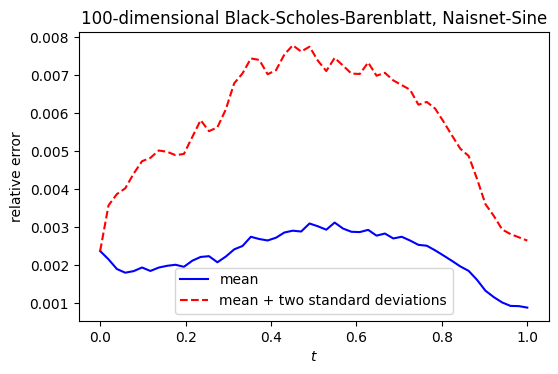

In [11]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM50Errors.pdf')

plt.show()

In [12]:
model.save_model("models/BlackScholesBarenblattMLMC100D2Layer100.pth")

In [32]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 2 * [64] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [33]:
model.load_model("models/BlackScholesBarenblattMLMC100D2Layer64.pth")

In [34]:
graph = model.iteration, model.training_loss

In [28]:
n_iter = 11 * 10**2
lr = 1e-8

In [45]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 0, Loss: 5.645e+05, Y0: 0.755, Time: 0.02, Learning Rate: 1.000e-03
It: 100, Loss: 2.258e+05, Y0: 31.237, Time: 1.26, Learning Rate: 1.000e-03
It: 200, Loss: 1.209e+05, Y0: 44.202, Time: 1.29, Learning Rate: 1.000e-03
It: 300, Loss: 5.743e+04, Y0: 56.223, Time: 1.29, Learning Rate: 1.000e-03
It: 400, Loss: 1.999e+04, Y0: 65.917, Time: 1.28, Learning Rate: 1.000e-03
It: 500, Loss: 9.194e+03, Y0: 72.600, Time: 1.29, Learning Rate: 1.000e-03
It: 600, Loss: 5.288e+03, Y0: 73.581, Time: 1.39, Learning Rate: 1.000e-03
It: 700, Loss: 3.927e+03, Y0: 75.092, Time: 1.48, Learning Rate: 1.000e-03
It: 800, Loss: 3.504e+03, Y0: 75.676, Time: 1.68, Learning Rate: 1.000e-03
It: 900, Loss: 3.363e+03, Y0: 73.623, Time: 1.74, Learning Rate: 1.000e-03
It: 1000, Loss: 3.348e+03, Y0: 75.998, Time: 1.42, Learning Rate: 1.000e-03
It: 1100, Loss: 2.912e+03, Y0: 73.499, Time: 1.31, Learning Rate: 1.000e-03
It: 1200, Loss: 2.932e+03, Y0: 75.558, Time: 1.21, Learning Rate: 1.000e-03
It: 1300, Loss: 2.

In [46]:
n_iter = 21 * 10**2
lr = 1e-5

In [47]:
tot = time.time()
print(model.device)
graph = model.train(n_iter, lr)
print("total time:", time.time() - tot, "s")

cuda:0
It: 19900, Loss: 6.522e+02, Y0: 76.070, Time: 0.18, Learning Rate: 1.000e-05
It: 20000, Loss: 6.588e+02, Y0: 76.635, Time: 15.17, Learning Rate: 1.000e-05
It: 20100, Loss: 5.942e+02, Y0: 76.707, Time: 14.20, Learning Rate: 1.000e-05
It: 20200, Loss: 6.342e+02, Y0: 76.799, Time: 14.21, Learning Rate: 1.000e-05
It: 20300, Loss: 6.059e+02, Y0: 76.816, Time: 14.12, Learning Rate: 1.000e-05
It: 20400, Loss: 6.177e+02, Y0: 76.800, Time: 14.14, Learning Rate: 1.000e-05
It: 20500, Loss: 6.432e+02, Y0: 76.772, Time: 14.48, Learning Rate: 1.000e-05
It: 20600, Loss: 6.377e+02, Y0: 76.852, Time: 14.47, Learning Rate: 1.000e-05
It: 20700, Loss: 6.291e+02, Y0: 76.815, Time: 14.40, Learning Rate: 1.000e-05
It: 20800, Loss: 6.110e+02, Y0: 76.870, Time: 15.70, Learning Rate: 1.000e-05
It: 20900, Loss: 6.312e+02, Y0: 76.836, Time: 14.25, Learning Rate: 1.000e-05
It: 21000, Loss: 6.184e+02, Y0: 76.804, Time: 14.51, Learning Rate: 1.000e-05
It: 21100, Loss: 5.945e+02, Y0: 76.847, Time: 16.51, Learn

In [35]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

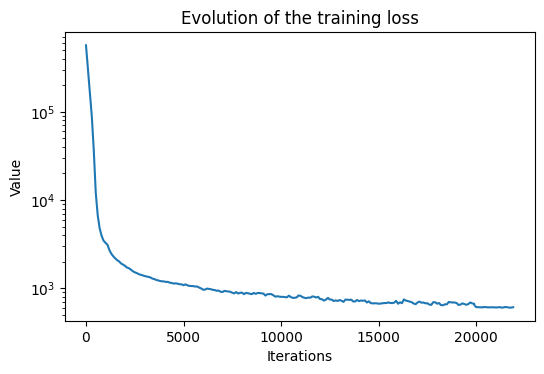

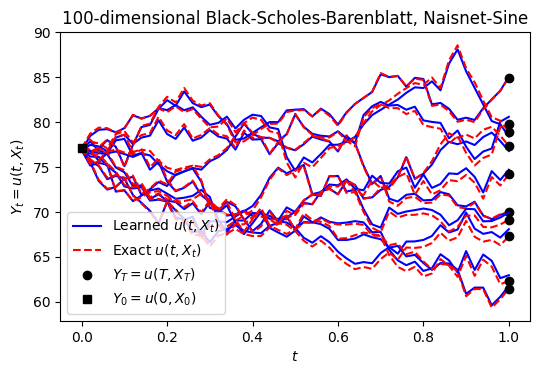

In [36]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM75Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM75Preds.pdf')

plt.show()

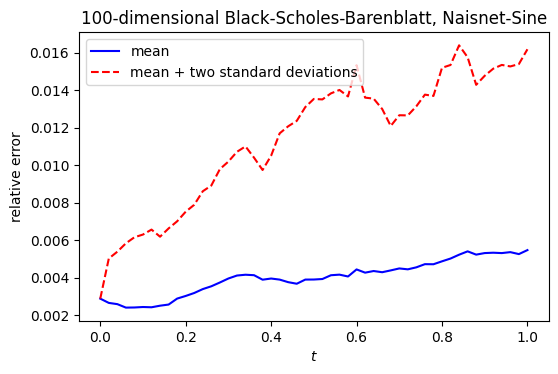

In [37]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM75Errors.pdf')

plt.show()

In [51]:
model.save_model("models/BlackScholesBarenblattMLMC100D2Layer64.pth")

In [38]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import time

M = 100  # number of trajectories (batch size)
N = 50  # number of time snapshots
D = 100 # number of dimensions
Mm = N ** (1/5)

layers = [D + 1] + 4 * [256] + [1]

Xi = np.array([1.0, 0.5] * int(D / 2))[None, :]
T = 1.0

"Available architectures"
mode = "Naisnet"  # FC and Naisnet are available
activation = "Sine"  # Sine, ReLU and Tanh are available
model = BlackScholesBarenblatt(Xi, T, M, N, D, Mm, layers, mode, activation)

n_iter = 2 * 10**4
lr = 1e-3

In [39]:
model.load_model("models/BlackScholesBarenblattMLMC100D2.pth")

In [40]:
graph = model.iteration, model.training_loss

In [41]:
np.random.seed(37)
t_test, W_test = model.fetch_minibatch()
X_pred, Y_pred = model.predict(Xi, t_test, W_test)
samples = 10

if type(t_test).__module__ != 'numpy':
    t_test = t_test.cpu().numpy()
if type(X_pred).__module__ != 'numpy':
    X_pred = X_pred.cpu().detach().numpy()
if type(Y_pred).__module__ != 'numpy':
    Y_pred = Y_pred.cpu().detach().numpy()

Y_test = np.reshape(u_exact(T,np.reshape(t_test[0:M, :, :], [-1, 1]), np.reshape(X_pred[0:M, :, :], [-1, D])),
                    [M, -1, 1])

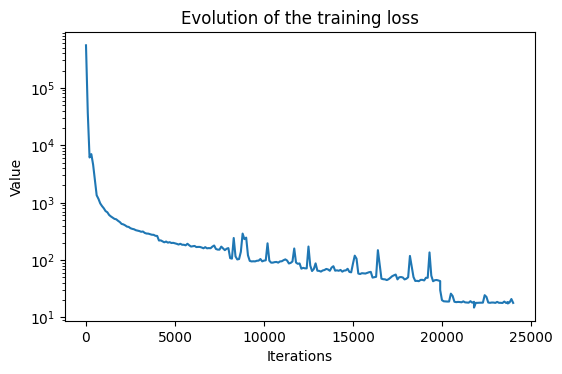

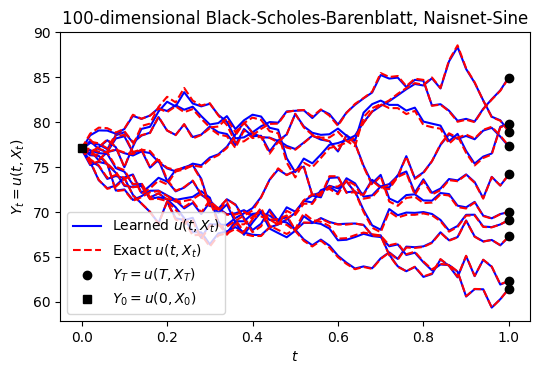

In [42]:
plt.figure(figsize=figsize(1))
plt.plot(graph[0], graph[1])
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.yscale("log")
plt.title('Evolution of the training loss')
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM150Loss.pdf')

plt.figure(figsize=figsize(1))
plt.plot(t_test[0:1, :, 0].T, Y_pred[0:1, :, 0].T, 'b', label='Learned $u(t,X_t)$')
plt.plot(t_test[0:1, :, 0].T, Y_test[0:1, :, 0].T, 'r--', label='Exact $u(t,X_t)$')
plt.plot(t_test[0:1, -1, 0], Y_test[0:1, -1, 0], 'ko', label='$Y_T = u(T,X_T)$')

plt.plot(t_test[1:samples, :, 0].T, Y_pred[1:samples, :, 0].T, 'b')
plt.plot(t_test[1:samples, :, 0].T, Y_test[1:samples, :, 0].T, 'r--')
plt.plot(t_test[1:samples, -1, 0], Y_test[1:samples, -1, 0], 'ko')

plt.plot([0], Y_test[0, 0, 0], 'ks', label='$Y_0 = u(0,X_0)$')

plt.xlabel('$t$')
plt.ylabel('$Y_t = u(t,X_t)$')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM150Preds.pdf')

plt.show()

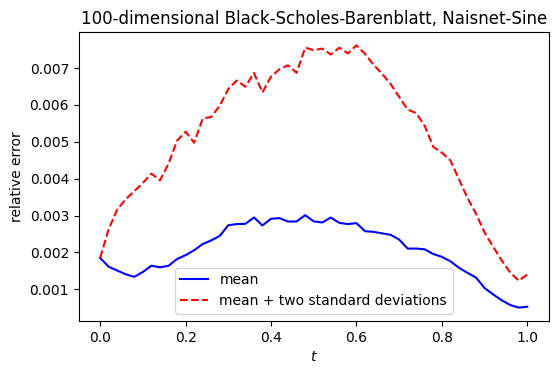

In [43]:
errors = np.sqrt((Y_test - Y_pred) ** 2 / Y_test ** 2)
mean_errors = np.mean(errors, 0)
std_errors = np.std(errors, 0)
plt.figure(figsize=figsize(1))
plt.plot(t_test[0, :, 0], mean_errors, 'b', label='mean')
plt.plot(t_test[0, :, 0], mean_errors + 2 * std_errors, 'r--', label='mean + two standard deviations')
plt.xlabel('$t$')
plt.ylabel('relative error')
plt.title(str(D) + '-dimensional Black-Scholes-Barenblatt, ' + model.mode + "-" + model.activation)
plt.legend()
# plt.savefig('Figures/BlackScholesBarenblattMLMC100DM150Errors.pdf')
plt.show()